In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model

# **Purpose**
### In this notebook we will begin our analysis for research question 3 - 'Do video game series get worse?'

# **Datasets**
### Input: 500-game_series.csv, 500.csv

In [3]:
if not os.path.exists("../data/prep/500.csv"):
    print("Missing dataset file")
else:
    print("Success!")

Success!


## **Series games V Non-series games**
Fistly I want to compare video games that are part of a series against video games that are not part of a series.

In [25]:
df=pd.read_csv('../data/prep/500.csv')
df.head()

,name,developer,rank,platform,release_date,publisher,na_sales,eu_sales,jp_sales,other_sales,...,meta_critic_count,meta_user_score,meta_user_count,meta_esrb,meta_genre,meta_multiplayer,meta_full_url,release_year,is_series,Matched_Name
0,Grand Theft Auto V,Rockstar North,4,PS3,2013-09-17,Rockstar Games,6370000,9850000,990000,3120000,...,50.0,8.3,4354,M,Modern,yes,https://www.metacritic.com/game/playstation-3/...,2013,yes,Grand Theft Auto V Grand Theft Auto IV Grand T...
1,Grand Theft Auto V,Rockstar North,6,PS4,2014-11-18,Rockstar Games,6060000,9710000,600000,3020000,...,66.0,8.3,4691,M,Action Adventure,yes,https://www.metacritic.com/game/playstation-4/...,2014,yes,Grand Theft Auto V Grand Theft Auto IV Grand T...
2,Grand Theft Auto: Vice City,Rockstar North,9,PS2,2002-10-28,Rockstar Games,8410000,5490000,470000,1780000,...,62.0,8.8,959,M,Action Adventure,no,https://www.metacritic.com/game/playstation-2/...,2002,yes,Grand Theft Auto: Vice City Grand Theft Auto: ...
3,Grand Theft Auto V,Rockstar North,10,X360,2013-09-17,Rockstar Games,9060000,5330000,60000,1420000,...,58.0,8.3,3817,M,Modern,yes,https://www.metacritic.com/game/xbox-360/grand...,2013,yes,Grand Theft Auto V Grand Theft Auto IV Grand T...
4,Grand Theft Auto IV,Rockstar North,13,X360,2008-04-29,Rockstar Games,6800000,3110000,140000,1040000,...,86.0,7.9,3234,M,Action Adventure,no,https://www.metacritic.com/game/xbox-360/grand...,2008,yes,Grand Theft Auto IV Grand Theft Auto V Grand T...


In [5]:
print('number of games that are part of a series:', len(df[df['is_series']=='yes']))
print('number of games that arent part of a series:', len(df[df['is_series']=='no']))

number of games that are part of a series: 3573
number of games that arent part of a series: 3807


### Its interesting to see that its almost a 50:50 split between number of games that are part of a series and the number of games that arent part of a series. I never thought of it before but when i look at the games I play, most of them are actually part of a series so I suppose video game series are very common.

## **Comparison of Sales**

In [6]:
data = df.groupby(['is_series']).sum()['global_sales']
data = pd.DataFrame(data.sort_values(ascending=False))
data.columns = ['Global Sales']

data2 = df.groupby(['is_series']).sum()['meta_critic_score']
data2 = pd.DataFrame(data2.sort_values(ascending=False))
data2.columns = ['Critic Rating']

data3 = df.groupby(['is_series']).count().iloc[:,0]
data3 = pd.DataFrame(data3)
data3.columns = ['Releases']

final_data = pd.merge(left=data, right=data2, how='left', left_on='is_series', right_on='is_series')
final_data = pd.merge(left=final_data, right=data3, how='left', left_on='is_series', right_on='is_series')
final_data.head()

,Global Sales,Critic Rating,Releases
is_series,,,
yes,2.820830e+09,258396,3573
no,1.375890e+09,252366,3807


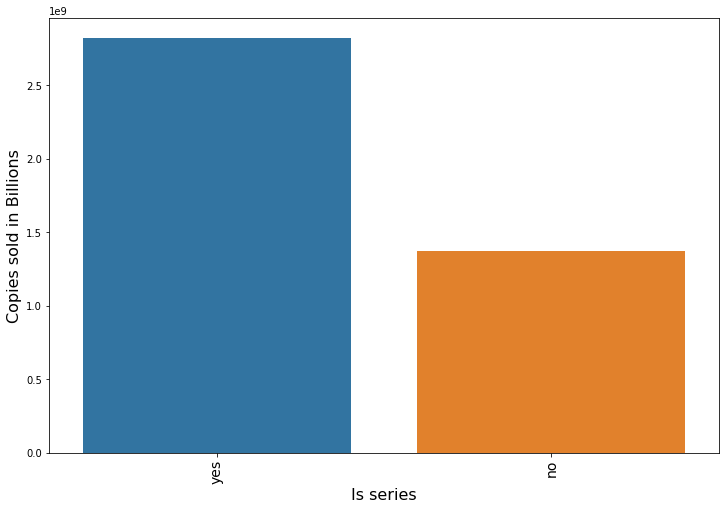

,Global Sales,Critic Rating,Releases
is_series,,,
yes,2.820830e+09,258396,3573
no,1.375890e+09,252366,3807


In [7]:
data=final_data
plt.figure(figsize=(12,8))
ax = sns.barplot(y ='Global Sales' , x = data.index, data=data)
ax.set_ylabel(ylabel='Copies sold in Billions', fontsize=16)
ax.set_xlabel(xlabel='Is series', fontsize=16)
#ax.set_title(label='Top 10 Total Publisher by copies sold', fontsize=20)
ax.set_xticklabels(labels =data.index, fontsize=14,rotation=90)

plt.show();
data.head()

### Games that are part of a video game series jave a far larger amount of overall sales despite having a slightly smaller amount of games. This isnt too surprising because if a game gets a lot of sales, developers might make more games as part of its series.

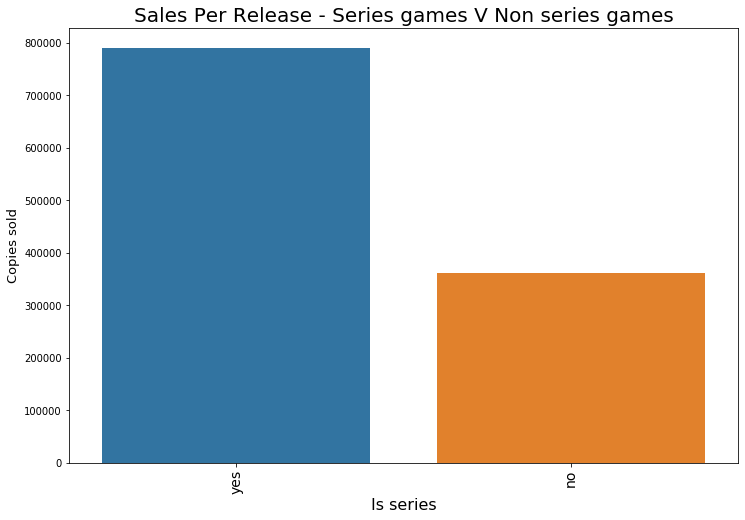

In [8]:
data = pd.DataFrame(final_data['Global Sales'] / final_data['Releases'])
data.columns = ['Sales Per Release']
series = data.index

plt.figure(figsize=(12,8))
ax = sns.barplot(x = series , y = 'Sales Per Release', data=data)
ax.set_ylabel(ylabel='Copies sold', fontsize=13)
ax.set_xlabel(xlabel='Is series', fontsize=16)
ax.set_title(label='Sales Per Release - Series games V Non series games', fontsize=20)
ax.set_xticklabels(labels = series, fontsize=14,rotation=90)
plt.show()

## **Comparisson of Rating**

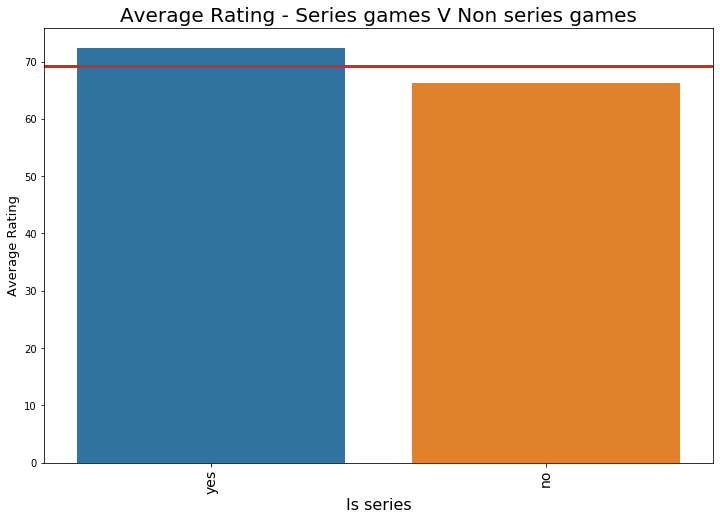

,Rating Per Release
is_series,
yes,72.319060
no,66.289992


In [9]:
data = pd.DataFrame(final_data['Critic Rating'] / final_data['Releases'])
data.columns = ['Rating Per Release']
data = pd.DataFrame(data.sort_values(by = 'Rating Per Release' ,ascending=False))
series = data.index

#colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(12,8))
ax = sns.barplot(x = series  , y = 'Rating Per Release', data=data)
ax.set_ylabel(ylabel='Average Rating', fontsize=13)
ax.set_xlabel(xlabel='Is series', fontsize=16)
ax.set_title(label='Average Rating - Series games V Non series games', fontsize=20)
ax.set_xticklabels(labels = series, fontsize=14,rotation=90)

mean=data['Rating Per Release'].mean()
ax.axhline(mean,color='tab:red',linewidth=3)


plt.show();
data.head()

## **Trends Within Series**
Now I want to look at indivdual series

In [16]:
series_df=pd.read_csv('../data/prep/500-game_series.csv')

In [17]:
data = series_df.groupby(['series_name']).sum()['global_sales']
data = pd.DataFrame(data.sort_values(ascending=False))
data.columns = ['Global Sales']

data2 = series_df.groupby(['series_name']).sum()['meta_critic_score']
data2 = pd.DataFrame(data2.sort_values(ascending=False))
data2.columns = ['Critic Rating']

data3 = series_df.groupby(['series_name']).count().iloc[:,0]
data3 = pd.DataFrame(data3)
data3.columns = ['Releases']

final_data = pd.merge(left=data, right=data2, how='left', left_on='series_name', right_on='series_name')
final_data = pd.merge(left=final_data, right=data3, how='left', left_on='series_name', right_on='series_name')

final_data['Length']=series_df.groupby('series_name').mean()['length']
final_data['Time Per Release'] =round(final_data['Length'] / final_data['Releases'])
final_data['Average Rating'] =final_data['Critic Rating'] / final_data['Releases']
final_data['Sales Per Release'] =final_data['Global Sales'] / final_data['Releases']

final_data.head()

,Global Sales,Critic Rating,Releases,Length,Time Per Release,Average Rating,Sales Per Release
series_name,,,,,,,
call of duty,170730000.0,1666.6,22,14.0,1.0,75.754545,7.760455e+06
fifa,145900000.0,2260.1,30,18.0,1.0,75.336667,4.863333e+06
grand theft auto,142520000.0,1013.8,12,14.0,1.0,84.483333,1.187667e+07
madden nfl,92850000.0,1658.7,21,18.0,1.0,78.985714,4.421429e+06
need for speed,87870000.0,1399.7,19,18.0,1.0,73.668421,4.624737e+06


In [32]:
final_data.to_csv('../data/analysis/series.csv')

## **Overall Sales**

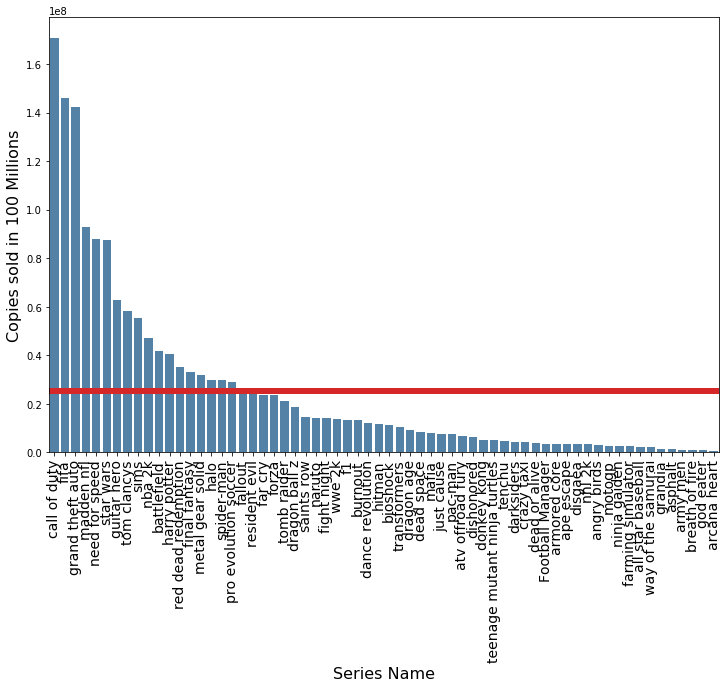

,Global Sales,Critic Rating,Releases,Length,Time Per Release,Average Rating,Sales Per Release
series_name,,,,,,,
call of duty,170730000.0,1666.6,22,14.0,1.0,75.754545,7.760455e+06
fifa,145900000.0,2260.1,30,18.0,1.0,75.336667,4.863333e+06
grand theft auto,142520000.0,1013.8,12,14.0,1.0,84.483333,1.187667e+07
madden nfl,92850000.0,1658.7,21,18.0,1.0,78.985714,4.421429e+06
need for speed,87870000.0,1399.7,19,18.0,1.0,73.668421,4.624737e+06


In [19]:
data = pd.DataFrame(final_data.sort_values(by='Global Sales',ascending=False))
series = final_data.index

plt.figure(figsize=(12,8))
ax = sns.barplot(y ='Global Sales' , x = series, data=data,color='steelblue')
ax.set_ylabel(ylabel='Copies sold in 100 Millions', fontsize=16)
ax.set_xlabel(xlabel='Series Name', fontsize=16)
#ax.set_title(label='Top 10 Total Publisher by copies sold', fontsize=20)
ax.set_xticklabels(labels =series, fontsize=14,rotation=90)
mean=data['Global Sales'].mean()
ax.axhline(mean,color='tab:red',linewidth=6)

plt.show();
final_data.head()

### This graph shows the overall number of game copies sold for each series. Fifa is the series with the most copies sold at one hundred and forty-five million, nine hundred thousand.

# **Releases**

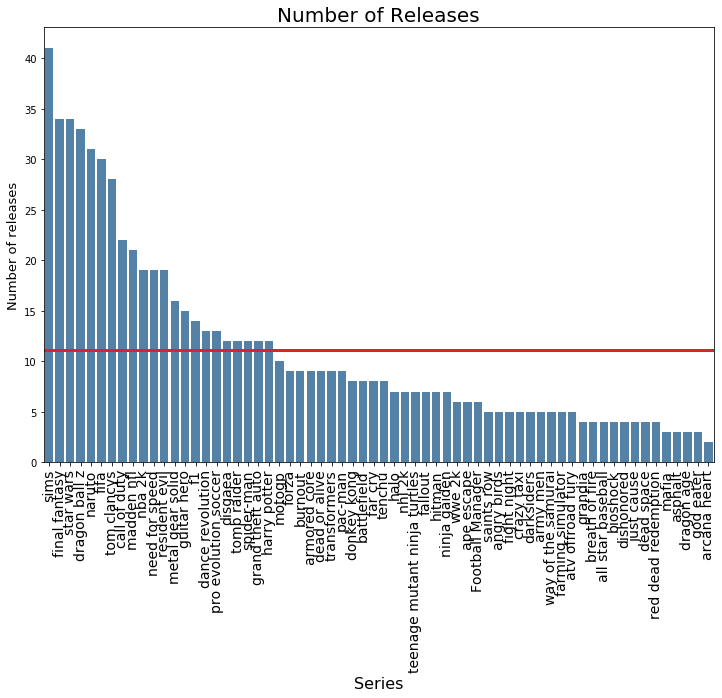

,Global Sales,Critic Rating,Releases,Length,Time Per Release,Average Rating,Sales Per Release
series_name,,,,,,,
mafia,8000000.0,215.0,3,12.0,4.0,71.666667,2.666667e+06
asphalt,1340000.0,152.0,3,8.0,3.0,50.666667,4.466667e+05
dragon age,9390000.0,252.5,3,5.0,2.0,84.166667,3.130000e+06
god eater,920000.0,221.5,3,3.0,1.0,73.833333,3.066667e+05
arcana heart,360000.0,150.0,2,6.0,3.0,75.000000,1.800000e+05


In [20]:
data = pd.DataFrame(final_data.sort_values(by='Releases',ascending=False))
series = data.index

plt.figure(figsize=(12,8))
ax = sns.barplot(x = series  , y = 'Releases', data=data,color='steelblue')
ax.set_ylabel(ylabel='Number of releases', fontsize=13)
ax.set_xlabel(xlabel='Series', fontsize=16)
ax.set_title(label='Number of Releases', fontsize=20)
ax.set_xticklabels(labels = series, fontsize=14,rotation=90)

mean=data['Releases'].mean()
ax.axhline(mean,color='tab:red',linewidth=3)


plt.show();
data.tail()

### This graph shows the numer of releases for each series. I am very surprised that sims has over 40 games in its series.

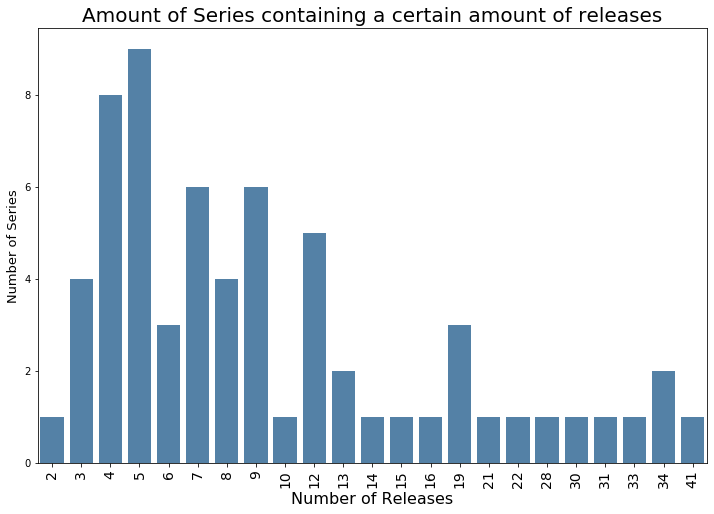

In [30]:
data = final_data.groupby(['Releases']).count()['Critic Rating']
data = pd.DataFrame(data)
data.columns = ['Amount']

plt.figure(figsize=(12,8))
ax = sns.barplot(x = data.index  , y = 'Amount', data=data,color='steelblue')
ax.set_ylabel(ylabel='Number of Series', fontsize=13)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_title(label='Amount of Series containing a certain amount of releases', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=90)
plt.show()

### From this graph you can see that 12 game series is the most common. Game series seem to mostly have between 3 and 12 games. Anything more than that is uncommon.

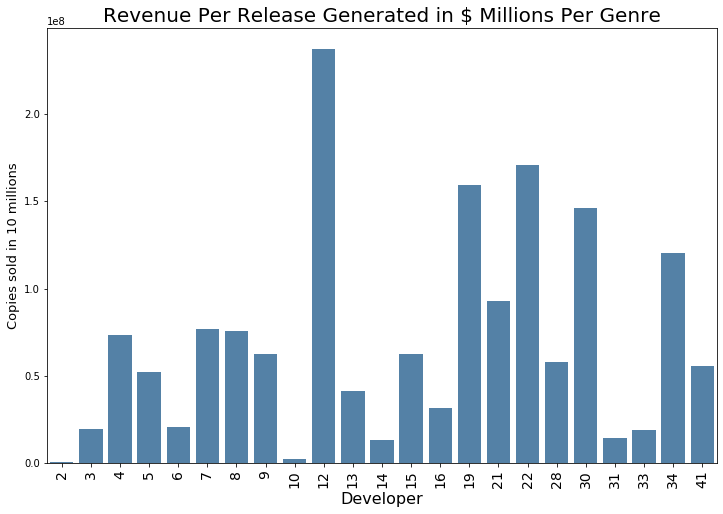

,Amount
Releases,
2,360000.0
3,19650000.0
4,73390000.0
5,52260000.0
6,20620000.0


In [29]:
data = final_data.groupby(['Releases']).sum()['Global Sales']
data = pd.DataFrame(data)
data.columns = ['Amount']
series=data.index

plt.figure(figsize=(12,8))
ax = sns.barplot(x = series , y = 'Amount', data=data,color='steelblue')
ax.set_ylabel(ylabel='Copies sold in 10 millions', fontsize=13)
ax.set_xlabel(xlabel='Developer', fontsize=16)
ax.set_title(label='Revenue Per Release Generated in $ Millions Per Genre', fontsize=20)
ax.set_xticklabels(labels = series, fontsize=14,rotation=90)
plt.show()
data.head()

### Game series with 12 games get the most sales per game. This is interesting as 12 game series are also the most common. 

## **Sales per release**

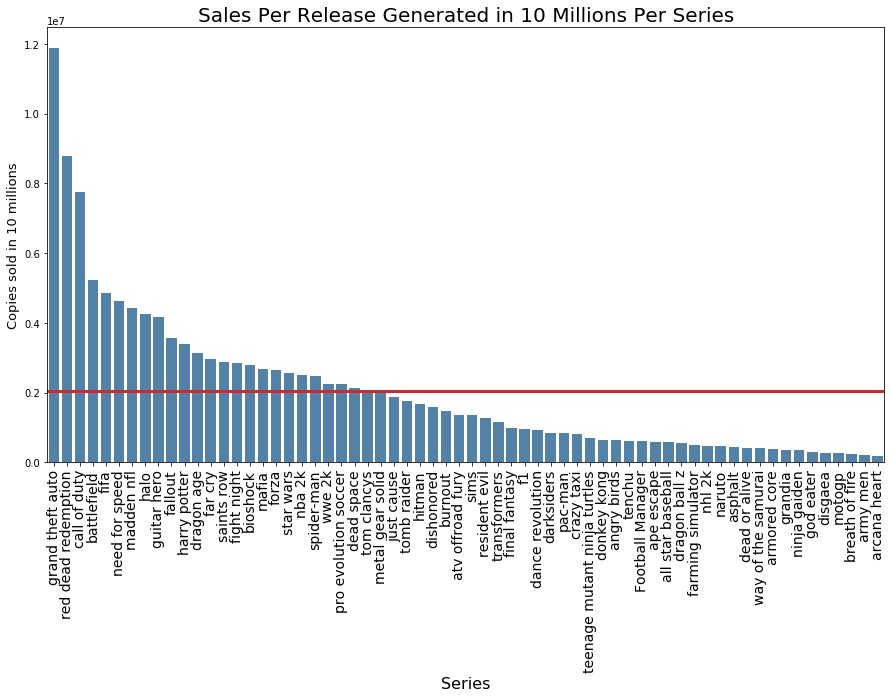

,Global Sales,Critic Rating,Releases,Length,Time Per Release,Average Rating,Sales Per Release
series_name,,,,,,,
grand theft auto,142520000.0,1013.8,12,14.0,1.0,84.483333,1.187667e+07
red dead redemption,35090000.0,307.0,4,8.0,2.0,76.750000,8.772500e+06
call of duty,170730000.0,1666.6,22,14.0,1.0,75.754545,7.760455e+06
battlefield,41930000.0,649.9,8,13.0,2.0,81.237500,5.241250e+06
fifa,145900000.0,2260.1,30,18.0,1.0,75.336667,4.863333e+06


In [28]:
data = final_data
data = pd.DataFrame(data.sort_values(by = 'Sales Per Release' ,ascending=False))
series = data.index

#colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(15,8))
ax = sns.barplot(x = series  , y = 'Sales Per Release', data=data,color='steelblue')
ax.set_ylabel(ylabel='Copies sold in 10 millions', fontsize=13)
ax.set_xlabel(xlabel='Series', fontsize=16)
ax.set_title(label='Sales Per Release Generated in 10 Millions Per Series', fontsize=20)
ax.set_xticklabels(labels = series, fontsize=14,rotation=90)

mean=data['Sales Per Release'].mean()
ax.axhline(mean,color='tab:red',linewidth=3)


#ax2=sns.scatterplot(series  , 'global_sales', data=max_sales,color='red')
#ax2=sns.scatterplot(series  , 'global_sales', data=min_sales,color='green')
plt.show();
data.head()

### This graph shows that grand theft auto is the series that gets the most sales per game. Its interesting to see that the top 2 games are made by rocktar. Grand theft auto's sales per game is around 5 times the mean.

## **Series average rating**

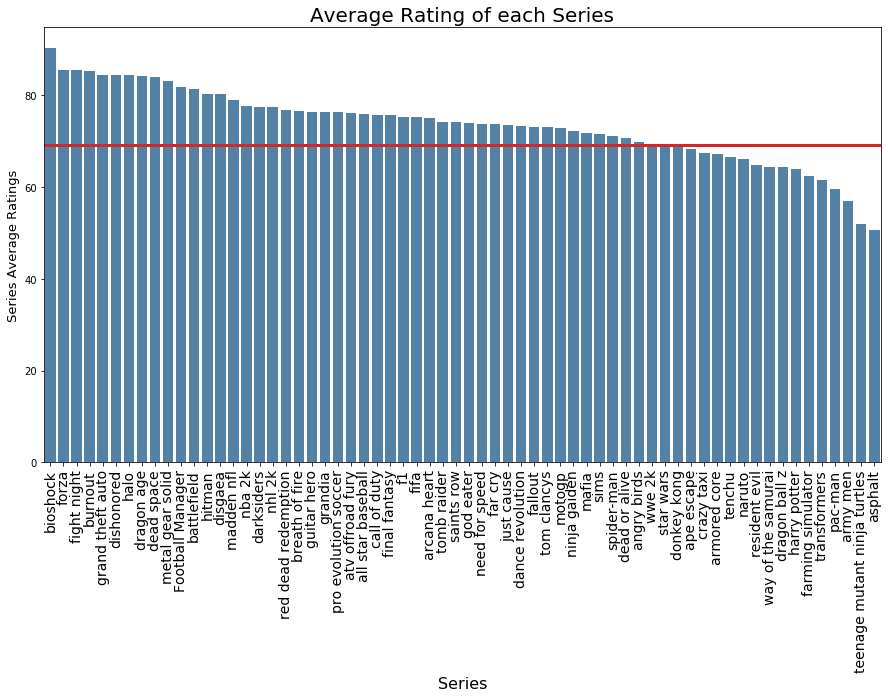

,Global Sales,Critic Rating,Releases,Length,Time Per Release,Average Rating,Sales Per Release
series_name,,,,,,,
bioshock,11180000.0,361.0,4,9.0,2.0,90.250000,2.795000e+06
forza,23730000.0,769.0,9,13.0,1.0,85.444444,2.636667e+06
fight night,14180000.0,427.2,5,7.0,1.0,85.440000,2.836000e+06
burnout,13260000.0,767.5,9,17.0,2.0,85.277778,1.473333e+06
grand theft auto,142520000.0,1013.8,12,14.0,1.0,84.483333,1.187667e+07


In [27]:
data =final_data
data = pd.DataFrame(data.sort_values(by = 'Average Rating' ,ascending=False))
series = data.index

max_sales=series_df.groupby('series_name').max()['global_sales']
max_sales = pd.DataFrame(max_sales)
min_sales=series_df.groupby('series_name').min()['global_sales']
min_sales = pd.DataFrame(min_sales)

#colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(15,8))
ax = sns.barplot(x = series  , y = 'Average Rating', data=data,color='steelblue')
ax.set_ylabel(ylabel='Series Average Ratings', fontsize=13)
ax.set_xlabel(xlabel='Series', fontsize=16)
ax.set_title(label='Average Rating of each Series', fontsize=20)
ax.set_xticklabels(labels = series, fontsize=14,rotation=90)

mean=df['meta_critic_score'].mean()
ax.axhline(mean,color='tab:red',linewidth=3)


plt.show();
data.head()

### This grqph once again shows grand theft auto on top. It shows each series average raing. Most series seem to have a high average rating. This is expected as developers wouldnt decide to make another game in the series if the previous games in the series didnt do well.

# **Year**
### I want to analyse the video game series in terms of duration in years. To do this I will need to figure out how long each series has been continueing for. To get this figure I will subtract the year of the series first game from the year of the series most recent game.

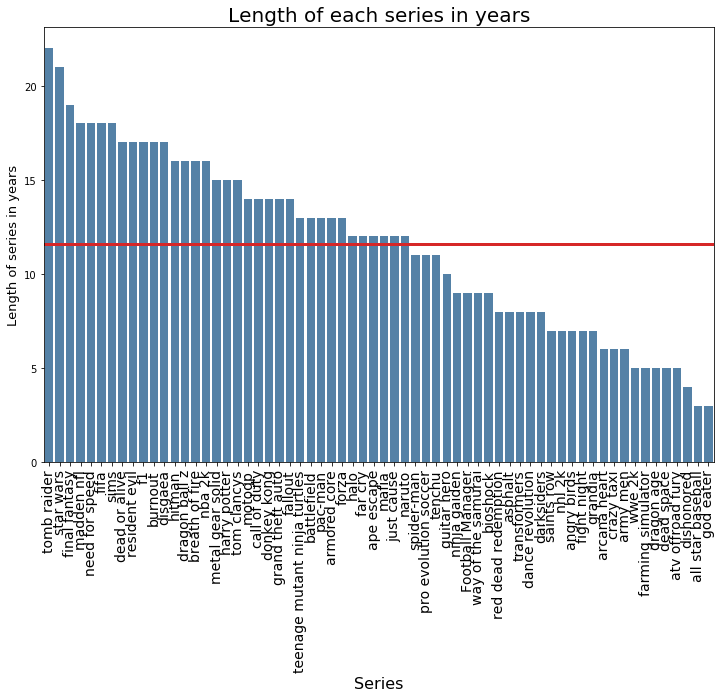

In [31]:
data=final_data.sort_values(by='Length',ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x = data.index  , y = 'Length', data=data,color='steelblue')
ax.set_ylabel(ylabel='Length of series in years', fontsize=13)
ax.set_xlabel(xlabel='Series', fontsize=16)
ax.set_title(label='Length of each series in years', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=90)

mean=data['Length'].mean()
ax.axhline(mean,color='tab:red',linewidth=3)

plt.show()

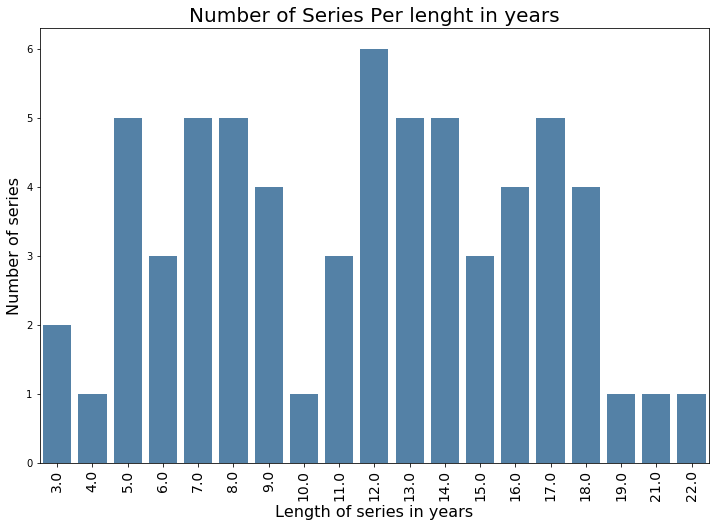

,Amount
Length,
3.0,2
4.0,1
5.0,5
6.0,3
7.0,5


In [602]:
data = final_data.groupby(['Length']).count()['Releases']
data = pd.DataFrame(data)
data.columns = ['Amount']

publishers= df2['len']
plt.figure(figsize=(12,8))
ax = sns.barplot(x = data.index  , y = 'Amount', data=data,color='steelblue')
ax.set_ylabel(ylabel='Number of series', fontsize=16)
ax.set_xlabel(xlabel='Length of series in years', fontsize=16)
ax.set_title(label='Number of Series Per lenght in years', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=90)
plt.show()
data.head()

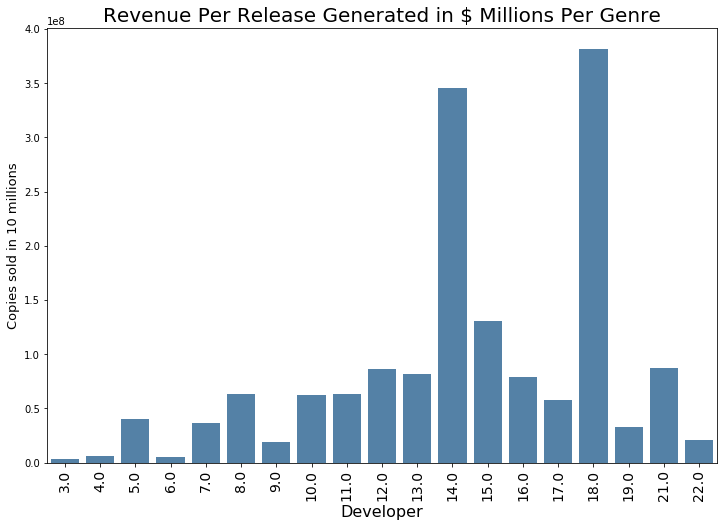

,Global Sales
Length,
3.0,3210000.0
4.0,6400000.0
5.0,40680000.0
6.0,5480000.0
7.0,36380000.0


In [601]:
data = final_data.groupby(['Length']).sum()['Global Sales']
data = pd.DataFrame(data)
data.columns = ['Global Sales']
series=data.index


plt.figure(figsize=(12,8))
ax = sns.barplot(x = series , y = 'Global Sales', data=data,color='steelblue')
ax.set_ylabel(ylabel='Copies sold in 10 millions', fontsize=13)
ax.set_xlabel(xlabel='Developer', fontsize=16)
ax.set_title(label='Revenue Per Release Generated in $ Millions Per Genre', fontsize=20)
ax.set_xticklabels(labels = series, fontsize=14,rotation=90)
plt.show()
data.head()

### Something I often think about in video games is how long you should wait to release the next game in the series. Some series have a new addition on a yearly basis while others dont get a game added to its collection for some time. Personaly Ive stopped buying Fifa games as theres a new game out every year and i felt as though they are all very simular. I sometimes wish that they would maybe wait a bit longer before releasing the next game. Maybe you can get too much of a good thing. Other series, like the grand thefy auto series have a large gap between releases (the most recent grand theft auto game came out in 2013 and the newsest edition isnt likely  to come out anytime soon).

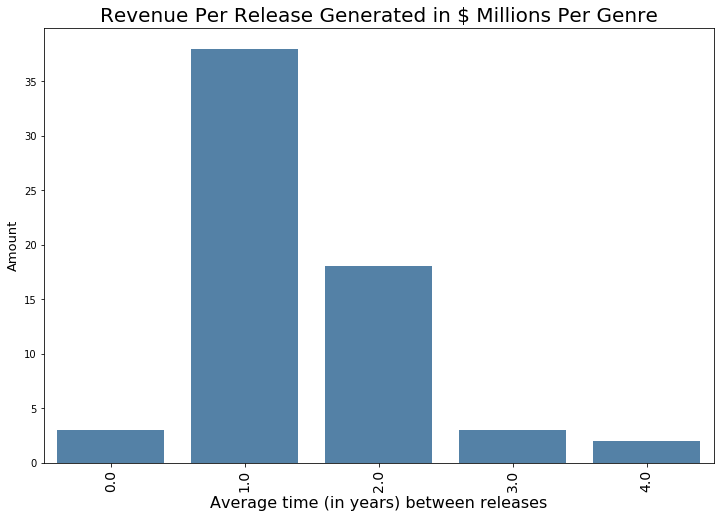

,Amount
Time Per Release,
0.0,3
1.0,38
2.0,18
3.0,3
4.0,2


In [600]:
data = final_data.groupby(['Time Per Release']).count()['Global Sales']
data = pd.DataFrame(data)
data.columns = ['Amount']


plt.figure(figsize=(12,8))
ax = sns.barplot(x = data.index , y = 'Amount', data=data,color='steelblue')
ax.set_ylabel(ylabel='Amount', fontsize=13)
ax.set_xlabel(xlabel='Average time (in years) between releases', fontsize=16)
ax.set_title(label='Revenue Per Release Generated in $ Millions Per Genre', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=90)
plt.show()
data.head()